Stratergy number 0 gained 0 total rewards for thompson sampling
Stratergy number 1 gained 1 total rewards for thompson sampling
Stratergy number 2 gained 28 total rewards for thompson sampling
Stratergy number 3 gained 748 total rewards for thompson sampling
Stratergy number 4 gained 7 total rewards for thompson sampling
Stratergy number 5 gained 0 total rewards for thompson sampling
Stratergy number 6 gained 3 total rewards for thompson sampling
Stratergy number 7 gained 0 total rewards for thompson sampling
Stratergy number 8 gained 0 total rewards for thompson sampling


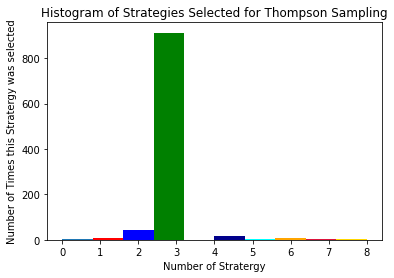

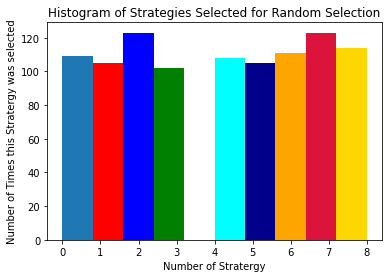

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random

N = 1000   # Let us assume there are 1000 customers. Number of rows
d = 9 # Let us assume there are 9 strategies. Number of columns

# Building the enviornment inside a simulation

conversion_rates = [0.09,0.17,0.67,0.84,0.34,0.04,0.26,0.08,0.09]

X = np.array(np.zeros([N,d]))
for i in range (N):
    for j in range(d):
        if np.random.rand() <= conversion_rates[j]:
            X[i][j] = 1
            
# Implementing random Selection and Thompson Sampling
strategies_selected_rs = []
strategies_selected_ts = []
total_reward_rs = 0
total_reward_ts = 0
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d 

# Random Selection
for n in range(0,N):
    stratergy_rs = random.randrange(d)
    strategies_selected_rs.append(stratergy_rs)
    reward_rs = X[n][stratergy_rs]
    total_reward_rs = total_reward_rs + reward_rs
    
    
# Thompson Sampling
for i in range(0,N):
    selected = 0
    maxrandom = 0
    for j in range(0,d):
        randomBeta = np.random.beta(number_of_rewards_1[j] + 1,number_of_rewards_0[j] + 1)
        if randomBeta > maxrandom:
            maxrandom = randomBeta
            selected = j
    if X[i][selected] == 1:
        number_of_rewards_1[selected] += 1
    else:
        number_of_rewards_0[selected] += 1
    strategies_selected_ts.append(selected)
    total_reward_ts = number_of_rewards_1  + number_of_rewards_0

for i in range(0,d):
   print('Stratergy number '+str(i+0)+' gained '+str(total_reward_ts[i])+ ' total rewards for thompson sampling')
  

n, bins, patches = plt.hist(strategies_selected_ts)
patches[1].set_fc('r')
patches[2].set_fc('b')
patches[3].set_fc('g')
patches[4].set_fc('y')
patches[5].set_fc('darkblue')
patches[6].set_fc('aqua')
patches[7].set_fc('orange')
patches[8].set_fc('crimson')
patches[9].set_fc('gold')
plt.title('Histogram of Strategies Selected for Thompson Sampling')
plt.xlabel('Number of Stratergy')
plt.ylabel('Number of Times this Stratergy was selected')
plt.xticks(range(0,9))
plt.show()



n, bins, patches = plt.hist(strategies_selected_rs)
patches[1].set_fc('r')
patches[2].set_fc('b')
patches[3].set_fc('g')
patches[4].set_fc('y')
patches[5].set_fc('aqua')
patches[6].set_fc('darkblue')
patches[7].set_fc('orange')
patches[8].set_fc('crimson')
patches[9].set_fc('gold')
plt.title('Histogram of Strategies Selected for Random Selection')
plt.xlabel('Number of Stratergy')
plt.ylabel('Number of Times this Stratergy was selected')
plt.xticks(range(0,9))
plt.show()